<a href="https://colab.research.google.com/github/lerrlera/IAT360-CV-Project-Group14/blob/myBranch/CV_Sign_For_Help.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision Problem: Sign For Help
###Group 14
Our computer vision project aims to develop a model capable of detecting and recognizing the [Signal for Help (SFH)](https://canadianwomen.org/signal-for-help/) hand gesture–a universal distress signal used by individuals experiencing violence or abuse. The problem we are addressing is the lack of accessible and automated tools that can identify this silent call for help, which could support early intervention and improve personal safety.

This is an important issue because many victims cannot ask for help out loud (e.g., the abuser is nearby), and this automatic gesture recognition could enable faster responses and potentially save lives. Our model could be used in real life to detect SFH through smartphone cameras, wearable devices, telehealth sessions, or public service kiosks, enabling faster intervention and support for individuals experiencing abuse.


## Importing Google Drive & Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

## Dataset Description
For this project, we need image data resembling two specific hand gestures as a picture below:

*   An open hand with tucked thumb
*   A closed hand with a trapped thumb



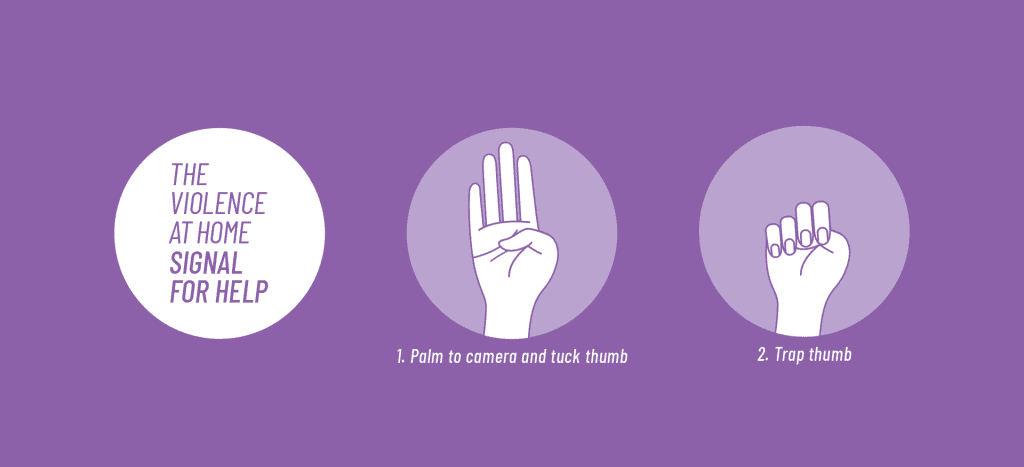

**Source:** Signal for help | Use Signal to ask for help.  (n.d.). Canadian Women’s Foundation. https://canadianwomen.org/signal-for-help/

###Details

These images were sourced from 2 existing datasets and organized into 2 class folders, ‘open_hand’ and ‘closed_hand’ for a classification task. Specifically, we used images labelled ‘B’ from the ASL dataset from the ASL dataset for our ‘open_hand’ class, and images labelled ‘A’ and ‘S’ for our ‘closed_hand’ class. We also supplemented our data with additional images from the Hands Images dataset, which better capture the specific thumb positions we needed and include hands wearing gloves.

We have 2 labels, ‘open_hand’ and ‘closed_hand’. Since this is a supervised classification task, the folder structure itself serves as a label; images in the ‘open_hand’ folder belong to ‘open_hand’ class, and the same labelling rule applies for those in the ‘closed_hand’ folder.

###Adding More Data
We also added 30 (15 for each class) new images each sourced from stock images (Adobe), our own photos of hands...


###Data Split

Total number of images in each class was: 3,052. 2/3 of this data should was used as training data, the rest is for evaluation:

**‘open_hand’**
*   2,035 images in train folder
*   1,017 images in test folder

**‘closed_hand’**
*   2,035 images in train folder
*   1,017 images in test folder


Here is a Google Drive link to the zipped datasets used in this project:



*   [SFH Dataset](https://drive.google.com/drive/folders/1puxrFn5ijZAyBCCPxtzP0QTTBX_QTSmd?usp=sharing)


Here are existing datasets we used to collect this data:

*   [ASL Alphabet Dataset on Kaggle](https://www.kaggle.com/datasets/grassknoted/asl-alphabet)
*   [Hands Images Dataset on Hugging Face](https://huggingface.co/datasets/trashsock/hands-images)

## Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO
  - Labels format should be darknet YOLO.
  - Labels files should be .txt files


### Heirarchy of Folders Correction

Defining paths to train and test folders.

Original codes below: https://github.com/jaejams/Week3-ClassicML/blob/main/week_3_machinelearning.ipynb

In [ ]:
#importing the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("Audio Data/*/*.wav"):
        file_name=os.path.basename(file)
        features = get_features(file) #extract features
        X.append(features) #extract features using get_features function #store as x, y variables
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X)

In [ ]:
from sklearn.model_selection import train_test_split
#these are the same codes, but we are just using different data.


############# Unscaled test/validation set #############
X_train, X_val, y_train, y_val = train_test_split(
    features, #feature set
    emotions, #label set
    test_size=0.2,
    random_state=42 #random_state - everytime you run this code, it will give you the same split. If you change it, it will give you a different split. actually shuffle data based on random number.
)


Original file for below codes: https://github.com/jaejams/Computer-Vision-Project/blob/main/ComputerVisionProject-revised.ipynb

In [ ]:
test_dir = '/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/test_zip/test'
train_dir = '/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/train_zip/train'

In [ ]:
#import os
#run it once for making directories

#os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
os.makedirs('/content/Datasets/FRUIT DATA/Final_data/images')
os.makedirs('/content/Datasets/FRUIT DATA/Final_data/labels')
os.makedirs('/content/Datasets/FRUIT DATA/Final_data/images/train')
os.makedirs('/content/Datasets/FRUIT DATA/Final_data/images/val')
os.makedirs('/content/Datasets/FRUIT DATA/Final_data/labels/train')
os.makedirs('/content/Datasets/FRUIT DATA/Final_data/labels/val')


In [ ]:
#set the paths to labels and images directory
label_dir= "/content/Datasets/FRUIT DATA/Final_data/labels"
image_dir="/content/Datasets/FRUIT DATA/Final_data/images"

In [ ]:
#import shutil
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))


In [ ]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

# Custom gesture classification using YOLO

YOLOv8 classification models use the -cls suffix, i.e. yolov8n-cls.pt and are pretrained on ImageNet. See Classification Docs for full details.

Original file: https://github.com/jaejams/Computer-Vision-Project-Overview/blob/main/copy_of_yolov8_tutorial.ipynb
https://github.com/jaejams/Computer-Vision-Project/blob/main/ComputerVisionProject-revised.ipynb

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model


In [ ]:
model

In [ ]:
model.train(data='mnist160', epochs=3)  # train the model

In [ ]:
%%writefile config.yaml
path: /content/Datasets/FRUIT DATA/Final_data
train: /content/Datasets/FRUIT DATA/Final_data/images/train
#test: (test dataset folder path)
val: /content/Datasets/FRUIT DATA/Final_data/images/val

# Classes
nc: 3 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: orange
  1: apple
  2: banana

In [ ]:
model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train/confusion_matrix_normalized.png')